# Lecture 3: Linear Regression with Continues Dependent Variable and Multiple Independent Variables

***

## 1- Importing Dataset, Libraries and Data Organization 

<br>
<br>
<font face="Helvetica" size="3.5px" color="#323752">In this lecture we will be working on, univariate descriptive statistics and graphics, some bivariate analysis and multivariate, continues dependent variable, linear regression. </font>

<br>
<br>
<font face="Helvetica" size="3.5px" color="#323752">As always we will import some funtions that will be used throughout the tutorial. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import operator
import csv
from collections import Counter
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import ipywidgets as widgets
from IPython.display import HTML
import random

<br>
<br>
<font face="Helvetica" size="3px" color="#323752" >We do not want to see undesired warnings in our report.</font>
<br>
<br>

In [2]:
warnings.filterwarnings('ignore')

<br>
<br>
<font face="Helvetica" size="3px" color="#323752" >In the following code cell we will create a function to hide/show code cells. Since some of the code cells that we will create in this tutorial is quite long especially the ones for the widgets. We will call this function inside the cells.</font>
<br>
<br>

In [3]:
#data = pd.read_csv(r'anes_data.csv')
#data.info()

<br>
<br>
<font face="Helvetica" size="3px" color="#323752" >Our dataset columns has code names for variables. We will change the names in oder to simplify the understanding.</font>
<br>
<br>

In [4]:
#data = data.rename(columns={'V201152': 'Thermo_republican'})
#data = data.rename(columns={'V202637': 'gender'})
#data = data.rename(columns={'V201507x': 'age'})
#data = data.rename(columns={'V201234': 'government'})
#data = data.rename(columns={'V201237': 'interTrust'})
#data = data.rename(columns={'V201352': 'elecTrust'})
#data = data.rename(columns={'V201435': 'religion'})
#data = data.rename(columns={'V201433': 'relImportance'})
#data = data.rename(columns={'V201436': 'newReligion'})

<br>
<br>
<font face="Helvetica" size="3px" color="#323752">After changing their names, let's get familiar with the variables.</font>
<br>
<br>

## 2- Variables 

<br>
<font face="Helvetica"  size="4px" color="#323752" > <b> 1) Thermo_republican: Thermometer toward the republican candidate</b> </font>

<br>
<font face="Helvetica" size="3px" color="#323752">This varible determines the feeling toward the candidate of republicans. This variable ranges from 0-100, we will treat it as a continuous variable. Thermo_republican will be our dependent variable in this tutorial.</font>
<br>

<br>
<font face="Helvetica"  size="4px" color="#323752" > <b> 2) Gender</b> </font>

<font face="Helvetica" size="3px" color="#323752">
1. Male
<br>
2. Female

<br>
<font face="Helvetica"  size="4px" color="#323752" > <b> 3) Age</b> </font>

<br>
<font face="Helvetica"  size="4px" color="#323752" > <b> 4) Government: Government run by a few</b> </font>

<br>
<font face="Helvetica" size="3px" color="#323752">The question is : Would you say the government is pretty much run by a few
big interests looking out for themselves or that it is run for the benefit of all the people?
<br> 1. Run by a few big interests
<br> 2. For the benefit of all the people
</font>

<br>
<font face="Helvetica"  size="4px" color="#323752" > <b> 5) InterTrust: Interpersonal trust</b> </font>

<br>
<font face="Helvetica" size="3px" color="#323752">The question is : Generally speaking, how often can you trust other people?
<br>1. Always
<br>2. Most of the time
<br>3. About half the time
<br>4. Some of the time
<br>5. Never
<br>

<br>
<font face="Helvetica"  size="4px" color="#323752" > <b> 6) ElecTrust: Election officials trust</b> </font>

<br>
<font face="Helvetica" size="3px" color="#323752">The question is : How much do you trust the officials who oversee elections
where you live?
<br>1. Not at all
<br>2. A little
<br>3. A moderate amount
<br>4. A lot
<br>5. A great deal
<br>

<br>
<font face="Helvetica"  size="4px" color="#323752" > <b> 7) Religion</b> </font>

<br>
<font face="Helvetica" size="3px" color="#323752">The question is : What is your present religion, if any?
<br>1. Protestant
<br>2. Roman Catholic
<br>3. Orthodox Christian (such as Greek or Russian Orthodox)
<br>4. Latter-Day Saints (LDS)
<br>5. Jewish
<br>6. Muslim
<br>7. Buddhist
<br>8. Hindu
<br>9. Atheist
<br>10. Agnostic
<br>11. Something else
<br>12. Nothing in particular
<br>

<br>
<font face="Helvetica"  size="4px" color="#323752" > <b> 8) RelImportance : Importance of religion</b> </font>

<br>
<font face="Helvetica" size="3px" color="#323752">The question is :How important is religion in your life?
<br>1. Extremely important
<br>2. Very important
<br>3. Moderately important
<br>4. A little important
<br>5. Not important at all
<br>

<br>
<font face="Helvetica"  size="4px" color="#323752" > <b> 9) NewReligion : A new variable</b> </font>

<br>
<font face="Helvetica" size="3px" color="#323752"> This is a binary variable to control for protestants for whom religion is either extremely important or very important which is created by using variables <b>religion</b> and <b>relImportance</b>.
<br>
1. Protestant and religion is extremely important or veryimportant.  
<br>
2. Either protestant but religion is not important part of life not or not a protestant.   

<br>
<br>
<font face="Helvetica" size="3px" color="#323752" >We need to get rid of the unnecessary variables to shrink the data, which has 1771 different variables (column entries). You can see the latest format of the dataset in the output below.</font>
<br>
<br>

In [5]:
#data2 = data[['Thermo_republican','gender','age','government','interTrust','elecTrust', 'religion', 'relImportance', 'newReligion']]

#data2.to_csv("data2.csv")
data2 = pd.read_csv(r'data2.csv')
data2 = data2[['Thermo_republican','gender','age','government','interTrust','elecTrust', 'religion', 'relImportance', 'newReligion']]
data2

,Thermo_republican,gender,age,government,interTrust,elecTrust,religion,relImportance,newReligion
0,100,-1,46,1,3,3,11,2,-1
1,0,-1,37,1,4,2,12,5,4
2,0,-1,40,1,4,4,11,3,-1
3,15,-1,41,1,2,4,2,1,-1
4,85,-1,72,1,4,2,12,4,4
...,...,...,...,...,...,...,...,...,...
8275,100,2,26,1,4,2,11,3,-1
8276,70,2,52,1,2,5,4,1,-1
8277,30,-1,45,1,4,3,2,3,-1
8278,100,-1,65,1,2,3,1,1,-1


<br>
<br>
<font face="Helvetica" size="3px" color="#323752" > Before starting the calculations, we need to cleanse the data set. Since missing informations are determined, we need to get rid of them. For instance, a missing information in Thermometer data is given with negative values. Therefore, we need to handle them to have more accurate result.</font>.

<br>
<font face="Helvetica" size="3px" color="#323752" > Also, we will create a new binary varible that controls respondent is either an extremely religous or very religious protestant. If respondents is one of them, the label will be one.

In [6]:
for i in range (len(data2['gender'])):
    if data2['gender'][i]==-1:
        data2['gender'][i]=1

for i in range (len(data2['religion'])):
    if data2['religion'][i]==1:
        if data2['relImportance'][i]==1 or data2['relImportance'][i]==2:
            data2['newReligion'][i]=1
        else:
            data2['newReligion'][i]=0
    else:
        data2['newReligion'][i]=0

for i in range (len(data2['Thermo_republican'])):
    if data2['Thermo_republican'][i]<0:
        data2['Thermo_republican'][i]=data2['Thermo_republican'].mean()

<br>
<br>
<font face="Helvetica" size="3px" color="#323752" > Now, we can examine the clear format.</font>.

In [7]:
data2

,Thermo_republican,gender,age,government,interTrust,elecTrust,religion,relImportance,newReligion
0,100,1,46,1,3,3,11,2,0
1,0,1,37,1,4,2,12,5,0
2,0,1,40,1,4,4,11,3,0
3,15,1,41,1,2,4,2,1,0
4,85,1,72,1,4,2,12,4,0
...,...,...,...,...,...,...,...,...,...
8275,100,2,26,1,4,2,11,3,0
8276,70,2,52,1,2,5,4,1,0
8277,30,1,45,1,4,3,2,3,0
8278,100,1,65,1,2,3,1,1,1


<br>
<br>
<font face="Helvetica" size="3px" color="#323752" >Let's calculate the univarite stats of the each variable. We will use <b>describe()</b> function of the pandas dataframe.</font>

In [8]:
data2.describe()

,Thermo_republican,gender,age,government,interTrust,elecTrust,religion,relImportance,newReligion
count,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000
mean,40.408575,0.229589,49.038889,1.031763,2.785266,3.324638,6.046014,2.759179,0.180193
std,39.742611,2.223543,20.771267,1.162830,1.061931,1.432433,4.942714,1.652934,0.384372
min,0.000000,-8.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000
25%,0.000000,1.000000,35.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
50%,30.000000,1.000000,51.000000,1.000000,3.000000,3.000000,5.000000,3.000000,0.000000
75%,85.000000,1.000000,65.000000,1.000000,4.000000,4.000000,11.000000,4.000000,0.000000
max,100.000000,2.000000,80.000000,2.000000,5.000000,5.000000,12.000000,5.000000,1.000000


<br>
<br>
<font face="Helvetica" size="3px" color="#323752" >Another operation that might be applied to these varibles is observing their correlations between them. In order to do that, we will use the heatmap funtion of seaborn library</font>.

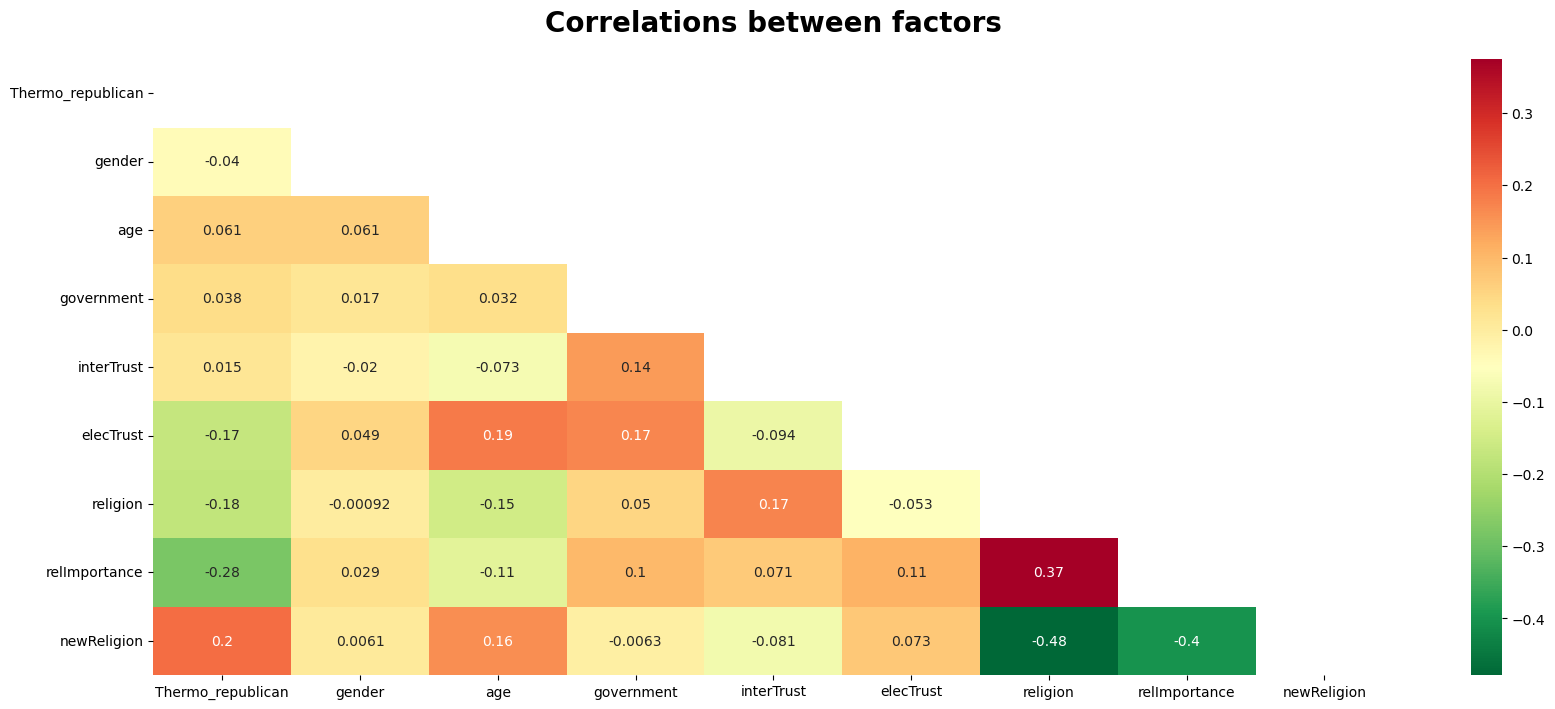

In [9]:
plt.figure(figsize=(20, 8))
sns.heatmap(data2.corr(), annot = True, cmap='RdYlGn_r', mask=np.triu(np.ones_like(data2.corr())));
plt.title('Correlations between factors', fontsize=20, fontweight='bold', pad=20);
plt.show()

<br>
<br>
<font face="Helvetica" size="3px" color="#323752" >As shown in the heatmap, some of the variables have positive correlations while some of them have negative. Positive correlation means that while one of the variables is increasing the other one increases as well. In negative correlation, while one of the variables is increasing the other one decreases</font>.

## 3- Descriptive Graphs

<br>
<br>
<font face="Helvetica" size="3px" color="#323752">In this part, we will plot some of the independent varibles, their distributions, probability density functions and also bivariate relations between them. We will start with Kernel Density Estimation (KDE) of our dependet variable. Kernel Density Estimation (KDE) is a way to estimate the probability density function of a continuous random variable</font>.

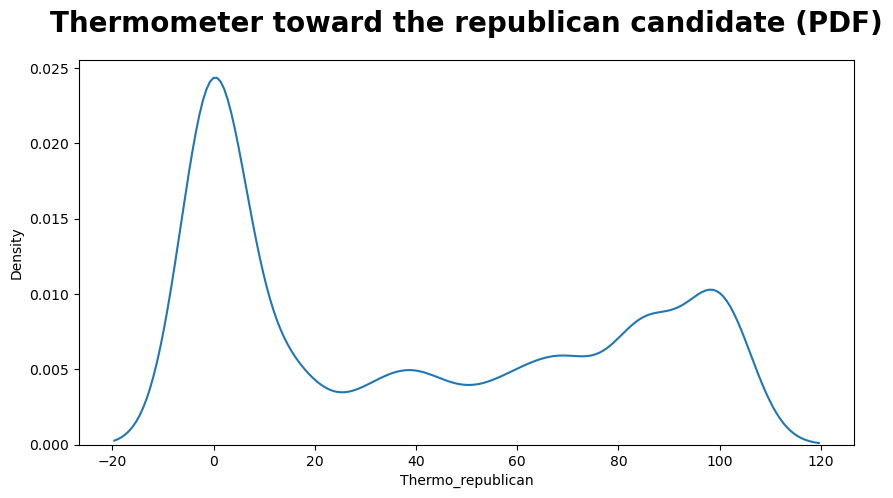

In [10]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=data2, x="Thermo_republican")
plt.title('Thermometer toward the republican candidate (PDF)', fontsize=20, fontweight='bold', pad=20);
plt.show()

<br>
<font face="Helvetica" size="3px" color="#323752">We can say that general approach is not positive toward the republician candidate. Let's continue with the independent variables. In this part <b>histograms</b> will be used to show the results. Labels are given in the variable section.
<br>

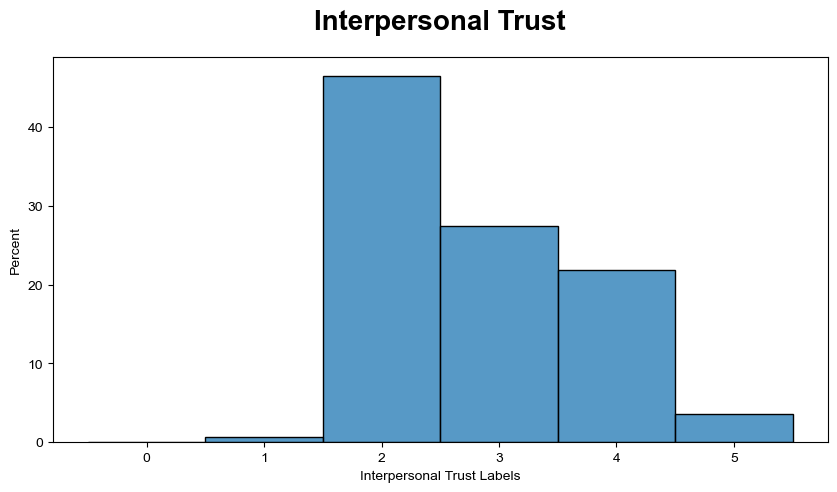

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data2['interTrust'], stat="percent",binrange=[0,data2['interTrust'].max()],  discrete=True);
sns.set_style("whitegrid", {'axes.grid' : True})
plt.title('Interpersonal Trust', fontsize=20, fontweight='bold', pad=20);
plt.xlabel('Interpersonal Trust Labels')
plt.show()

<br>
<font face="Helvetica" size="3px" color="#323752">The most common answer to interpersonal trust question is <b>2. Most of the time.</b> Second parameter is age.

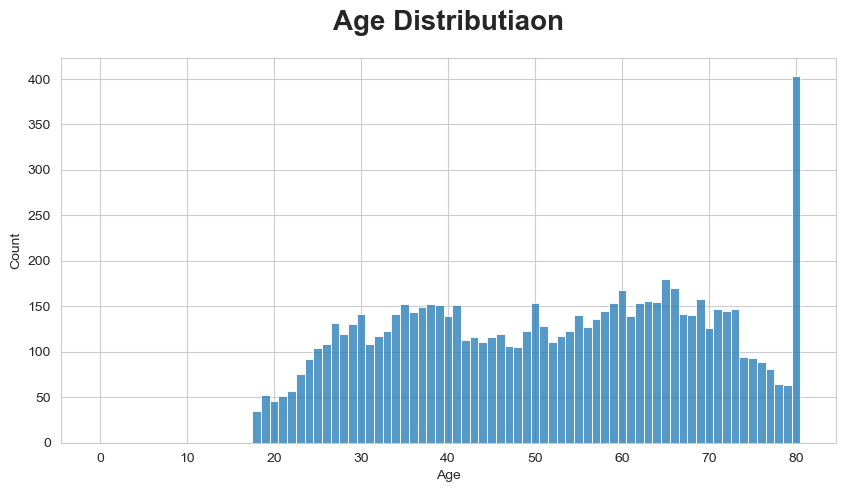

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data2['age'], stat="count",binrange=[0,data2['age'].max()],  discrete=True);
sns.set_style("whitegrid", {'axes.grid' : True})
plt.title('Age Distributiaon', fontsize=20, fontweight='bold', pad=20);
plt.xlabel('Age')
plt.show()

<br>
<font face="Helvetica" size="3px" color="#323752"> 80 years old and older ages are given as 80 in our dataset. Next graph is about election officials trust.

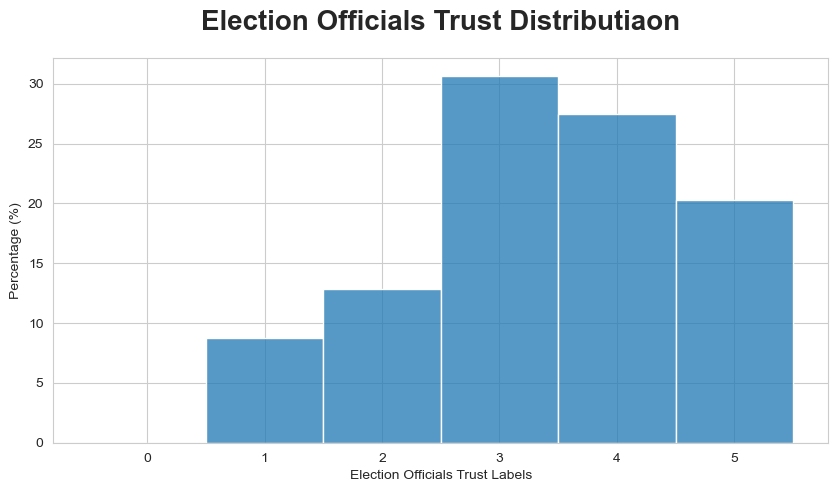

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data2['elecTrust'], stat="percent",binrange=[0,data2['elecTrust'].max()],  discrete=True);
sns.set_style("whitegrid", {'axes.grid' : True})
plt.title('Election Officials Trust Distributiaon', fontsize=20, fontweight='bold', pad=20);
plt.xlabel('Election Officials Trust Labels')
plt.ylabel('Percentage (%)')
plt.show()

<br>
<font face="Helvetica" size="3px" color="#323752"> The most common answers are <b>3. A moderate amount</b> and <b>4. A lot</b>. Next is government run by a few.

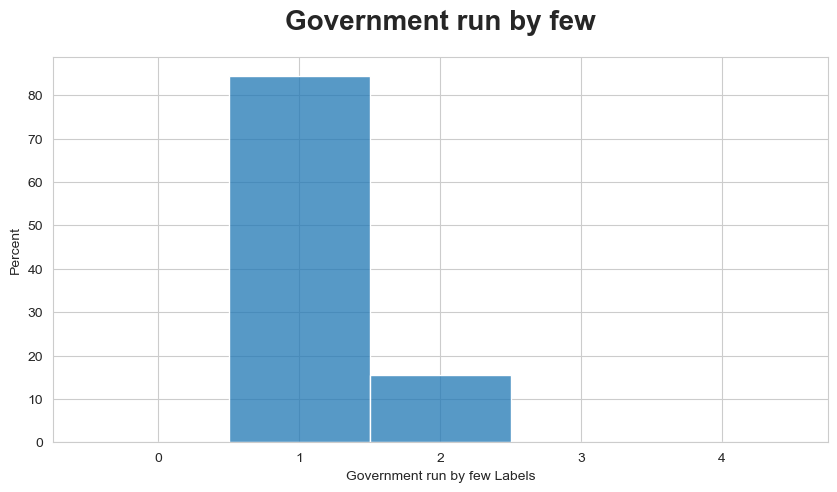

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data2['government'], stat="percent",binrange=[0,data2['government'].max()+2],  discrete=True);
sns.set_style("whitegrid", {'axes.grid' : True})
plt.title('Government run by few', fontsize=20, fontweight='bold', pad=20);
plt.xlabel('Government run by few Labels')
plt.show()

<br>
<font face="Helvetica" size="3px" color="#323752">There is a clear winner, 1. Government is pretty much run by a few big interests looking out for themselves. Next operation will be a regression plot that shows the relation between our new varible that is about protestant religion information and thermometer toward the republican candidate. Before examining the result below, please read the variable section of <b>newReligion</b> again.
<br>

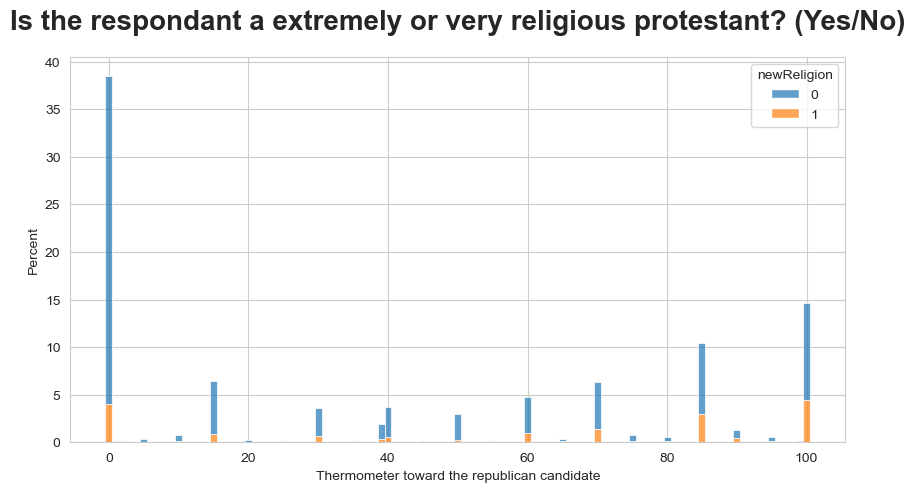

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot( x='Thermo_republican', data=data2,alpha = .7
            ,hue = 'newReligion',  stat="percent", discrete=True, binwidth=1, multiple="stack", label='freedom_house');
sns.set_style("whitegrid", {'axes.grid' : False})
plt.title('Is the respondant a extremely or very religious protestant? (Yes/No)', fontsize=20, fontweight='bold', pad=20);
plt.xlabel('Thermometer toward the republican candidate')

plt.show()

## 4- Linear Regression

<br>
<font face="Helvetica" size="3px" color="#323752">In this section, we will learn about the <b> Multiple Linear Regression Model </b> and its implementation in Python.
<br>
<font face="Helvetica" size="3px" color="#323752">Multiple Linear Regression is an extension of Simple Linear regression as it takes more than one predictor variable to predict the response variable. It is an important regression algorithm that models the linear relationship between a single dependent continuous variable and more than one independent variable. It uses two or more independent variables to predict a dependent variable by fitting a best linear relationship.
<br>
It has two or more independent variables (X) and one dependent variable (Y), where Y is the value to be predicted. Thus, it is an approach for predicting a quantitative response using multiple features.
<br>

<br>
<font face="Helvetica" size="3px" color="#323752">Set the values for independent (X) variable and dependent (Y) variable.

In [16]:
x = data2[['gender','age','government','interTrust',
           'elecTrust', 'religion', 'relImportance', 'newReligion']]

y = data2['Thermo_republican']

<br>
<font face="Helvetica" size="3px" color="#323752"> Split the dataset into train and test set. <b>train_test_split  </b> is used for splitting data arrays into two subsets: for training data and testing data. With this function, you don’t need to divide the dataset manually. We need to split our dataset into training and testing sets. We’ll perform this by importing train_test_split from the sklearn.model_selection library. It is usually good to keep 75% of the data in your train dataset and the rest 25% in your test dataset.
<br>

In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 100)

<br>
<font face="Helvetica" size="3px" color="#323752"> Implement the linear model. We will use LinearRegression() from sklearn.
<br>

In [18]:
#Fitting the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

<br>
<font face="Helvetica" size="3px" color="#323752"> To obtain the regression equation coefficients we will implement the following code.
<br>

In [19]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  61.06446327528372
Coefficients:


[('gender', -0.5694783290983726),
 ('age', 0.12335737057836153),
 ('government', 3.3502712826184933),
 ('interTrust', 0.3218141225170065),
 ('elecTrust', -5.212525087965339),
 ('religion', -0.4986582582672586),
 ('relImportance', -4.610846822140651),
 ('newReligion', 10.961267990760895)]

<br>
<font face="Helvetica" size="3px" color="#323752"> Once we have fitted (trained) the model, we can make predictions using the <b>predict()</b> function. We pass the values of x_test to this method and compare the predicted values called y_pred_mlr with y_test values to check how accurate our predicted values are.
<br>

In [20]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [47.17917471 37.95754948 42.17566438 ... 53.75536376 52.5331664
 34.04949262]


<br>
<font face="Helvetica" size="3px" color="#323752"> Actual values and the predicted values.
<br>

In [21]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff

,Actual value,Predicted value
8002,100,47.179175
1432,85,37.957549
1629,0,42.175664
3192,15,22.280323
6754,40,53.969793
...,...,...
1129,0,24.757928
7085,100,54.889877
399,100,53.755364
7839,70,52.533166


<br>
<font face="Helvetica" size="3px" color="#323752"> In order to evaluate the model we wiil use <b>metrics</b> from sklearn.
<br>

In [22]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 12.52
Mean Absolute Error: 32.95629067316155
Mean Square Error: 1384.8373438061174
Root Mean Square Error: 37.21340274425489


<br>
<font face="Helvetica" size="3px" color="#323752"> Our R Squared value is quite low which shows us how many points fall on the regression line. Also error values are considerably high. Which indicates that this dataset or varibles that we choosed are not appropriate to obtain a good linear regression model.
<br>

<br>
<font face="Helvetica" size="3px" color="#323752">We can see the data points and linear regression plot of the model below.
<br>

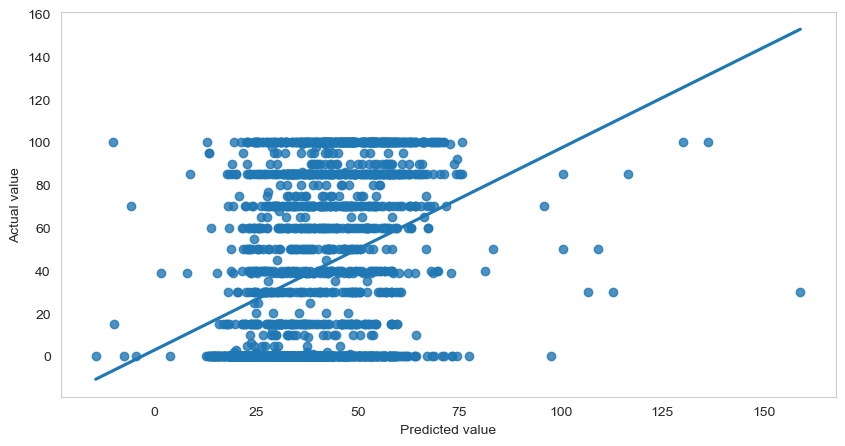

In [23]:
plt.figure(figsize=(10, 5))
sns.regplot(x='Predicted value', y='Actual value', data=mlr_diff, ci=None);

plt.show()

## 5- Interactive Linear Regression Widgets 

<br>
<font face="Helvetica" size="3px" color="#323752"> In this part, we use logistic regression widgets. We demonstrate simple logistic regression of single variable using interactive control elements. We will use a single varible for the sake of simplicity of visualization.

<br>
<font face="Helvetica" size="3px" color="#323752"> Let's start with importing the widget functions.

In [24]:
from ipywidgets import interact, interactive, IntSlider, Layout, interact_manual

<br>
<font face="Helvetica" size="3px" color="#323752"> The following widgets  allow the user to introduce noise, change model complexity, and examine the impact of regularization, all on the fly and see the resulting model and predictions instantly.

In [25]:
N_samples = 25
x_min = -5
x_max = 5
x1= np.linspace(x_min,x_max,N_samples*5)
x= np.random.choice(x1,size=N_samples)
noise_std=1
noise_mean=0
noise_magnitude = 2

In [26]:
def func_gen(N_samples,x_min,x_max,noise_magnitude,noise_sd,noise_mean):
    x1= np.linspace(x_min,x_max,N_samples*5)
    x= np.random.choice(x1,size=N_samples)
    y=2*x-0.6*x**2+0.2*x**3+18*np.sin(x)
    y1=2*x1-0.6*x1**2+0.2*x1**3+18*np.sin(x1)
    y= y+noise_magnitude*np.random.normal(loc=noise_mean,scale=noise_sd,size=N_samples)
    plt.figure(figsize=(8,5))
    plt.plot(x1,y1,c='k',lw=2)
    plt.scatter(x,y,edgecolors='k',c='c',s=60)
    plt.grid(True)
    plt.show()
    return (x,y,x1,y1)

<br>
<font face="Helvetica" size="3px" color="#323752"> The first widget will create data samples with different parameters. User can change the number of the data points, lower and upper limit of the range. Also magnitude, mean, and standard deviation of the noise are the other parameters that can be changed. Constructed data points will be spliting to test and training data in the following widget.

In [27]:

p=interactive(func_gen,N_samples={'Low (75 samples)':75,'High (250 samples)':250},x_min=(-5,0,1), x_max=(0,5,1),
              noise_magnitude=(0,5,1),noise_sd=(0.1,1,0.1),noise_mean=(-2,2,0.5))
p

interactive(children=(Dropdown(description='N_samples', options={'Low (75 samples)': 75, 'High (250 samples)':…

In [28]:
x,y,x1,y1 = p.result

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline

In [30]:
lasso_eps = 0.01
lasso_nalpha=20
lasso_iter=3000
ridge_alphas = (0.001,0.01,0.1,1)

def func_fit(model_type,test_size,degree):
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=test_size,random_state=55)
    
    if (model_type=='Linear regression'):
        model = make_pipeline(PolynomialFeatures(degree,interaction_only=False), 
                          LinearRegression(normalize=True))
    if (model_type=='LASSO with CV'):    
        model = make_pipeline(PolynomialFeatures(degree,interaction_only=False), 
                              LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter,normalize=True,cv=5))
        
    if (model_type=='Ridge with CV'):    
        model = make_pipeline(PolynomialFeatures(degree,interaction_only=False), 
                              RidgeCV(alphas=ridge_alphas,normalize=True,cv=5))
    
    X_train=X_train.reshape(-1,1)
    X_test=X_test.reshape(-1,1)
    
    model.fit(X_train,y_train)
    
    train_pred = np.array(model.predict(X_train))
    train_score = model.score(X_train,y_train)
    
    test_pred = np.array(model.predict(X_test))
    test_score = model.score(X_test,y_test)
    
    RMSE_test=np.sqrt(np.mean(np.square(test_pred-y_test)))
    RMSE_train=np.sqrt(np.mean(np.square(train_pred-y_train)))
       
    plt.figure(figsize=(14,6))
    
    plt.subplot(1,2,1)
    plt.title("Test set performance\nTest score: %.3f"%(test_score),fontsize=16)
    plt.xlabel("X-test",fontsize=13)
    plt.ylabel("y-test",fontsize=13)
    plt.scatter(X_test,y_test,edgecolors='k',c='blue',s=60)
    plt.scatter(X_test,test_pred,edgecolors='k',c='c',s=60)
    plt.grid(True)
    plt.legend(['Actual test values','Predicted values'])
    
    plt.subplot(1,2,2)
    plt.title("Training set performance\nTraining score: %.3f"%(train_score),fontsize=16)
    plt.xlabel("X-train",fontsize=13)
    plt.ylabel("y-train",fontsize=13)
    plt.scatter(X_train,y_train,c='blue')
    plt.scatter(X_train,train_pred,c='c')
    plt.grid(True)
    plt.legend(['Actual training values','Fitted values'])
    
    plt.show()
       
    return (train_score,test_score)

<br>
<font face="Helvetica" size="3px" color="#323752">Let's talk about the following interactive hyperparameters.The first one choses the model type. The following one is test fraction which determines the size of the test set (fraction of total sample data used in test). Last one is Model complexity (degree of polynomial).

<br>
<font face="Helvetica" size="3px" color="#323752"> You can observe the test and training scores by changing these parameters.

In [31]:
style = {'description_width': 'initial'}
# Continuous_update = False for IntSlider control to stop continuous model evaluation while the slider is being dragged
m = interactive(func_fit,model_type=widgets.RadioButtons(options=['Linear regression','LASSO with CV', 'Ridge with CV'],
                                                    description = "Choose Model",style=style,
                                                        layout=Layout(width='250px')),
                test_size=widgets.Dropdown(options={"10% of data":0.1,"20% of data":0.2, "30% of data":0.3,
                                                    "40% of data":0.4,"50% of data":0.5},
                                          description="Test set size ($X_{test}$)",style=style),
               degree=widgets.IntSlider(min=1,max=10,step=1,description= 'Polynomial($\sum\limits_{i=1}^n a_nx^n$)',
                                       style=style,continuous_update=False))

# Set the height of the control.children[-1] so that the output does not jump and flicker
output = m.children[-1]
output.layout.height = '450px'
m

interactive(children=(RadioButtons(description='Choose Model', layout=Layout(width='250px'), options=('Linear …